# Student Performance Indicator Description
## Life cycle of Machine learning Project
- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model

## Problem statement
- This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.
## Data Collection
- Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
- The data consists of 8 column and 1000 rows.


## Dataset information
- gender : sex of students -> (Male/female)
- race_ethnicity : ethnicity of students -> (group A, group B, group C, group D, group E)
- parental_level_of_education : parents' final education -> (bachelor's degree, some college, master's degree, associate's degree, high school)
- lunch : having lunch before test (standard or free/reduced)
- test_preparation_course : complete or not complete before test
- math_score
- reading_score
- writing_score

# Data Exploration

In [1]:
# Import Data and Required Packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
pwd

'G:\\student_performence\\student_performance\\notebooks'

In [3]:
# Import the CSV data as Pandas DataFrame
df = pd.read_csv(filepath_or_buffer='data/StudentsPerformance.csv')

In [4]:
# Show Top 5 Records
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
# Shape of the dataset
df.shape

(1000, 8)

In [6]:
# Check Missing values
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [7]:
print('[INFO...] There are NO MISSING values in the dataset.')

[INFO...] There are NO MISSING values in the dataset.


In [8]:
# Check Duplicates
df.duplicated().sum()

0

In [9]:
print('[INFO...] There are NO DUPLICATE values in the dataset.')

[INFO...] There are NO DUPLICATE values in the dataset.


In [10]:
# Check data type
df.dtypes

gender                         object
race_ethnicity                 object
parental_level_of_education    object
lunch                          object
test_preparation_course        object
math_score                      int64
reading_score                   int64
writing_score                   int64
dtype: object

In [11]:
# Check data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [12]:
# Check the number of unique values of each column
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [13]:
# Check statistics of data set
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [14]:
# Insight
print('From above description of numerical data, all means are very close to each other - between 66 and 68.05')
print('All standard deviations are also close - between 14.6 and 15.19')
print('While there is a minimum score 0 for math, for writing minimum is much higher = 10 and for reading myet higher = 17')

From above description of numerical data, all means are very close to each other - between 66 and 68.05
All standard deviations are also close - between 14.6 and 15.19
While there is a minimum score 0 for math, for writing minimum is much higher = 10 and for reading myet higher = 17


In [15]:
# Check various categories present in the different categorical column
print("Categories in 'gender' feature : {}".format(df['gender'].unique()))
print("Categories in 'race_ethnicity' feature : {}".format(df['race_ethnicity'].unique()))
print("Categories in'parental level of education' feature : {}".format(df['parental_level_of_education'].unique()))
print("Categories in 'lunch' feature : {}".format(df['lunch'].unique()))
print("Categories in 'test preparation course' feature : {}".format(df['test_preparation_course'].unique()))

Categories in 'gender' feature : ['female' 'male']
Categories in 'race_ethnicity' feature : ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in'parental level of education' feature : ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' feature : ['standard' 'free/reduced']
Categories in 'test preparation course' feature : ['none' 'completed']


In [16]:
# Define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# Print columns
print('There is {} Numerical features : {}'.format(len(numeric_features), numeric_features))
print('There is {} Categorical features : {}'.format(len(categorical_features), categorical_features))

There is 3 Numerical features : ['math_score', 'reading_score', 'writing_score']
There is 5 Categorical features : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [17]:
# Adding columns for "Total Score" and "Average"
df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average_score'] = (df['total_score'] / 3).round(2)

In [18]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.67
1,female,group C,some college,standard,completed,69,90,88,247,82.33
2,female,group B,master's degree,standard,none,90,95,93,278,92.67
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.33
4,male,group C,some college,standard,none,76,78,75,229,76.33


In [19]:
reading_full_score = df[df['reading_score']==100]['average_score'].count()
writing_full_score = df[df['writing_score']==100]['average_score'].count()
math_full_score = df[df['math_score']==100]['average_score'].count()

print(f'Number of students with full score in Reading : {reading_full_score} studemts.')
print(f'Number of students with full score in Writing : {writing_full_score} studemts.')
print(f'Number of students with full score in Maths : {math_full_score} studemts.')

Number of students with full score in Reading : 17 studemts.
Number of students with full score in Writing : 14 studemts.
Number of students with full score in Maths : 7 studemts.


In [20]:
# Insights
print('[INFO...] From above values we get students have performed the worst in Maths.')
print('[INFO...] Best performance is in Reading section.')

[INFO...] From above values we get students have performed the worst in Maths.
[INFO...] Best performance is in Reading section.


# Data Visualization
## Visualize average score distribution to make some conclusion.
- Histogram
- Kernel Distribution Function (KDE)

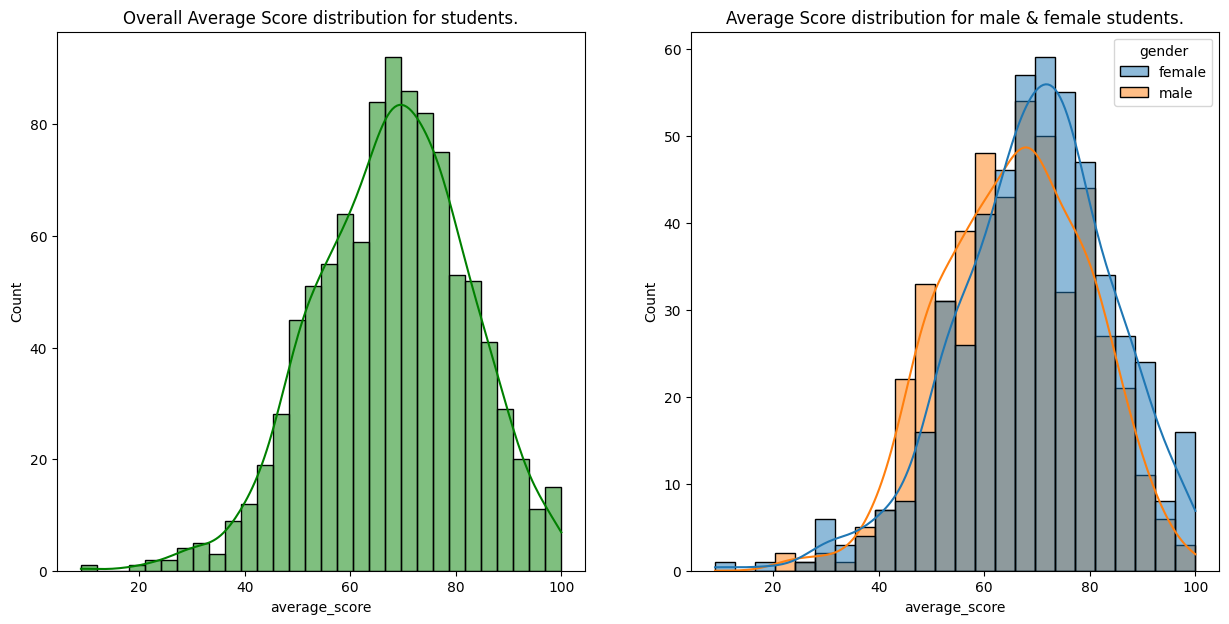

In [21]:
fig, axs = plt.subplots(nrows=1,
                        ncols=2,
                        figsize=(15, 7))
plt.subplot(121)
sns.histplot(x='average_score',
             data=df,
             bins=30,
             kde=True,
             color='g')
plt.title(label='Overall Average Score distribution for students.')

plt.subplot(122)
sns.histplot(x='average_score',
             data=df,
             kde=True,
             hue='gender')
plt.title(label='Average Score distribution for male & female students.')

plt.show()

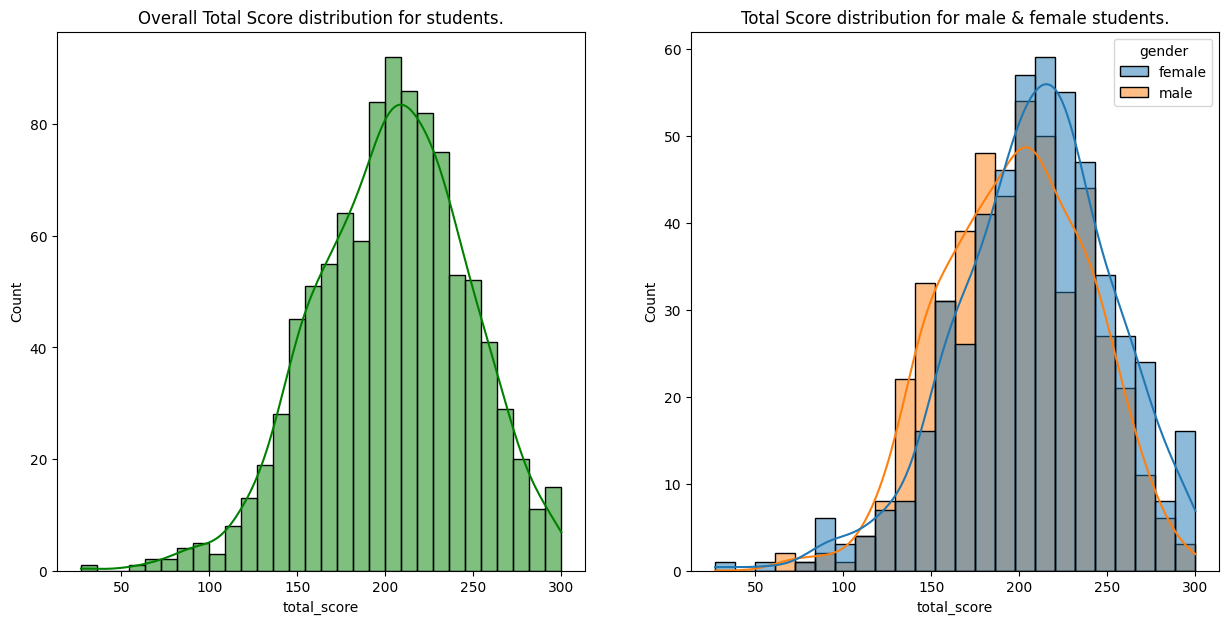

In [22]:
fig, axs = plt.subplots(nrows=1,
                        ncols=2,
                        figsize=(15, 7))
plt.subplot(121)
sns.histplot(x='total_score',
             data=df,
             bins=30,
             kde=True,
             color='g')
plt.title(label='Overall Total Score distribution for students.')

plt.subplot(122)
sns.histplot(x='total_score',
             data=df,
             kde=True,
             hue='gender')
plt.title(label='Total Score distribution for male & female students.')

plt.show()

In [23]:
# Insights
print('[INFO...] Female students tend to perform well then male students.')

[INFO...] Female students tend to perform well then male students.


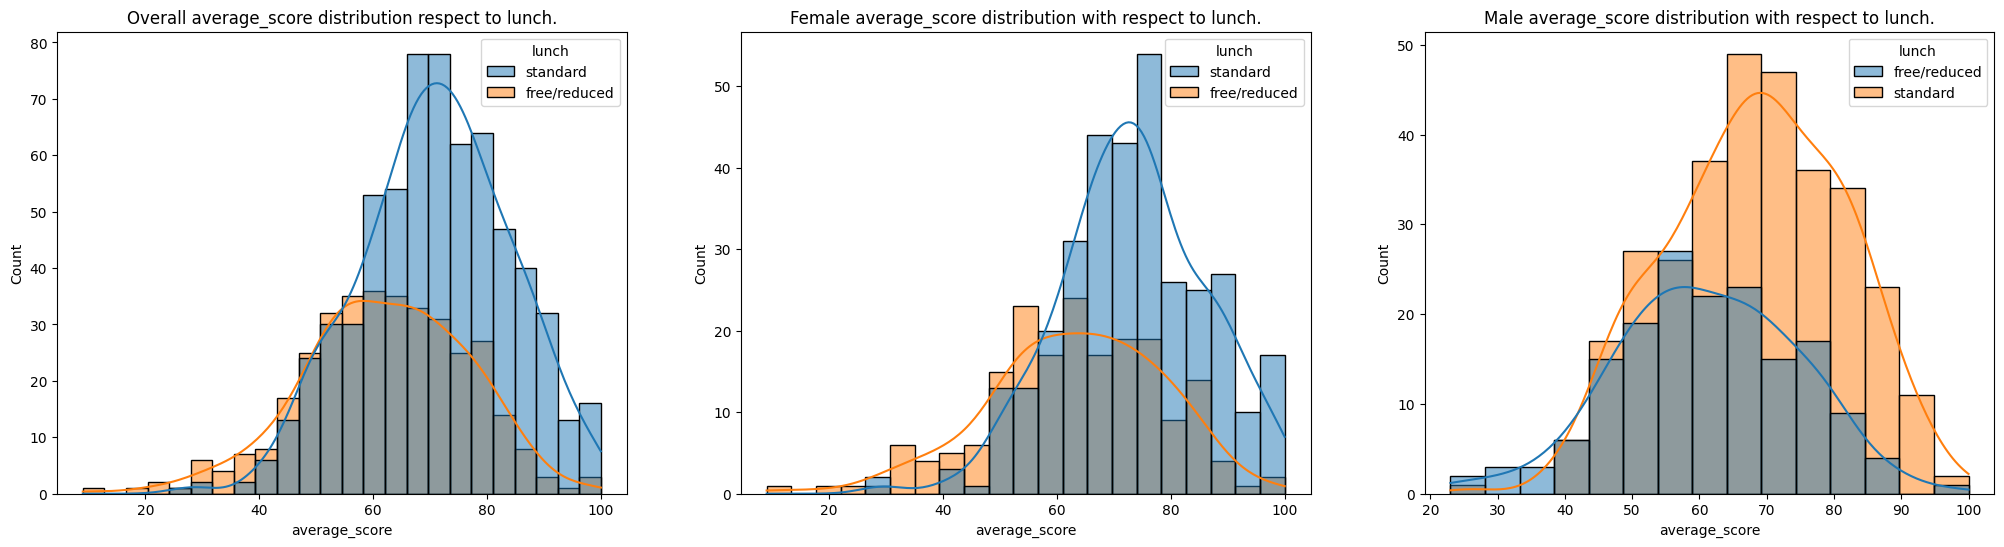

In [24]:
fig, axs = plt.subplots(nrows=1,
                        ncols=3,
                        figsize=(25,6))
plt.subplot(131)
sns.histplot(x='average_score',
             data=df,
             kde=True,
             hue='lunch')
plt.title(label='Overall average_score distribution respect to lunch.')

plt.subplot(132)
sns.histplot(x='average_score',
             data=df[df.gender=='female'],
             kde=True,
             hue='lunch')
plt.title(label='Female average_score distribution with respect to lunch.')

plt.subplot(133)
sns.histplot(x='average_score',
             data=df[df.gender=='male'],
             kde=True,
             hue='lunch')
plt.title(label='Male average_score distribution with respect to lunch.')

plt.show()

In [25]:
# Insights
print('[INFO...] Standard lunch helps perform well in exams.')
print('[INFO...] Standard lunch helps perform well in exams for both male and female.')

[INFO...] Standard lunch helps perform well in exams.
[INFO...] Standard lunch helps perform well in exams for both male and female.


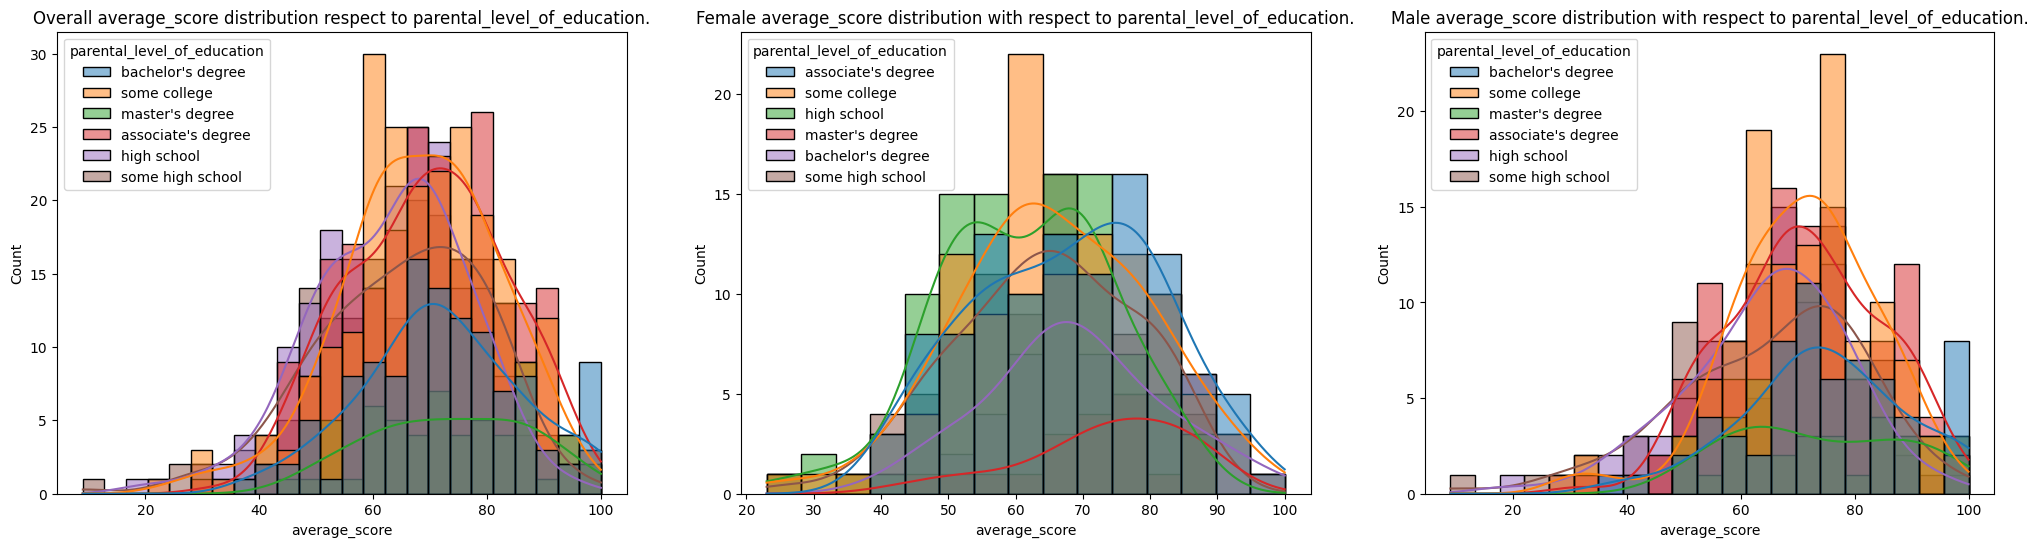

In [26]:
plt.subplots(1, 3, figsize=(25,6))
plt.subplot(131)
ax =sns.histplot(x='average_score',
                 data=df,
                 kde=True,
                 hue='parental_level_of_education')
plt.title(label='Overall average_score distribution respect to parental_level_of_education.')

plt.subplot(132)
ax =sns.histplot(x='average_score',
                 data=df[df.gender=='male'],
                 kde=True,
                 hue='parental_level_of_education')
plt.title(label='Female average_score distribution with respect to parental_level_of_education.')

plt.subplot(133)
ax =sns.histplot(x='average_score',
                 data=df[df.gender=='female'],
                 kde=True,
                 hue='parental_level_of_education')
plt.title(label='Male average_score distribution with respect to parental_level_of_education.')

plt.show()

In [27]:
# Insights
print("[INFO...] In general parent's education don't help student perform well in exam.")
print("[INFO...] 2nd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam.")
print("[INFO...] 3rd plot we can see there is no effect of parent's education on female students.")

[INFO...] In general parent's education don't help student perform well in exam.
[INFO...] 2nd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam.
[INFO...] 3rd plot we can see there is no effect of parent's education on female students.


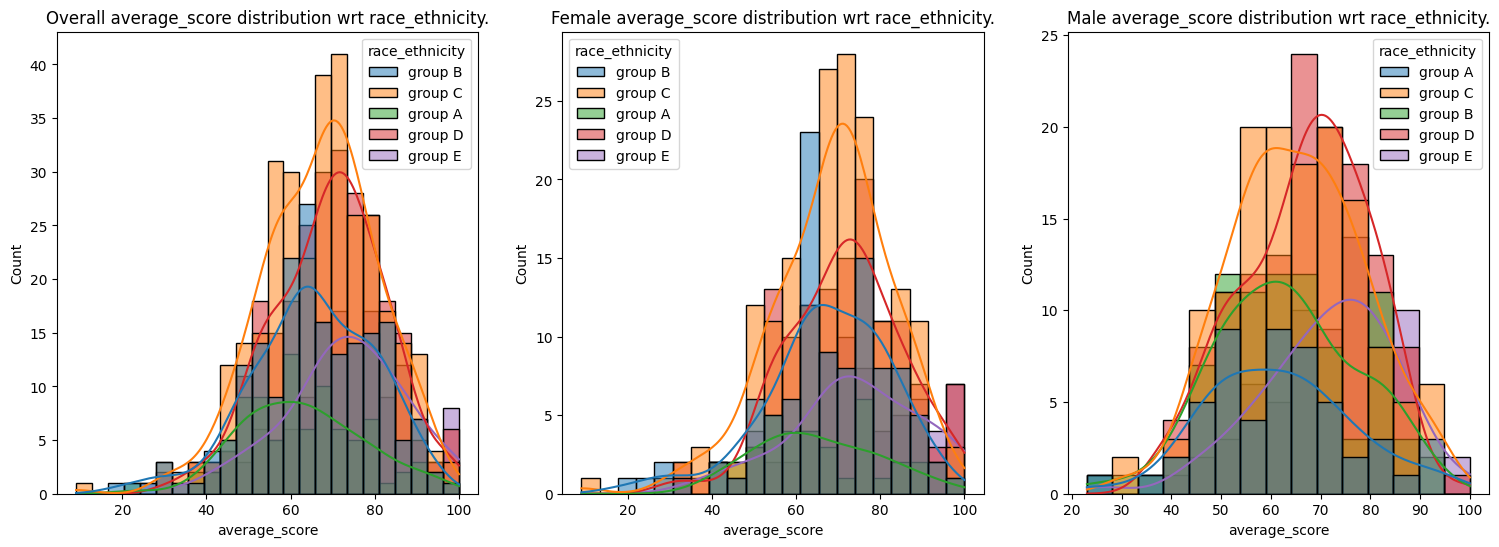

In [28]:
plt.subplots(1, 3, figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(x='average_score',
                 data=df,
                 kde=True,
                 hue='race_ethnicity')
plt.title(label='Overall average_score distribution wrt race_ethnicity.')

plt.subplot(142)
ax =sns.histplot(x='average_score',
                 data=df[df.gender=='female'],
                 kde=True,
                 hue='race_ethnicity')
plt.title(label='Female average_score distribution wrt race_ethnicity.')

plt.subplot(143)
ax =sns.histplot(x='average_score',
                 data=df[df.gender=='male'],
                 kde=True,
                 hue='race_ethnicity')
plt.title(label='Male average_score distribution wrt race_ethnicity.')

plt.show()

In [29]:
# Insights
print('[INFO...] Students of group A and group B tends to perform poorly in exam.')
print('[INFO...] Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female.')

[INFO...] Students of group A and group B tends to perform poorly in exam.
[INFO...] Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female.


### 4.2 Maximumum score of students in all three subjects

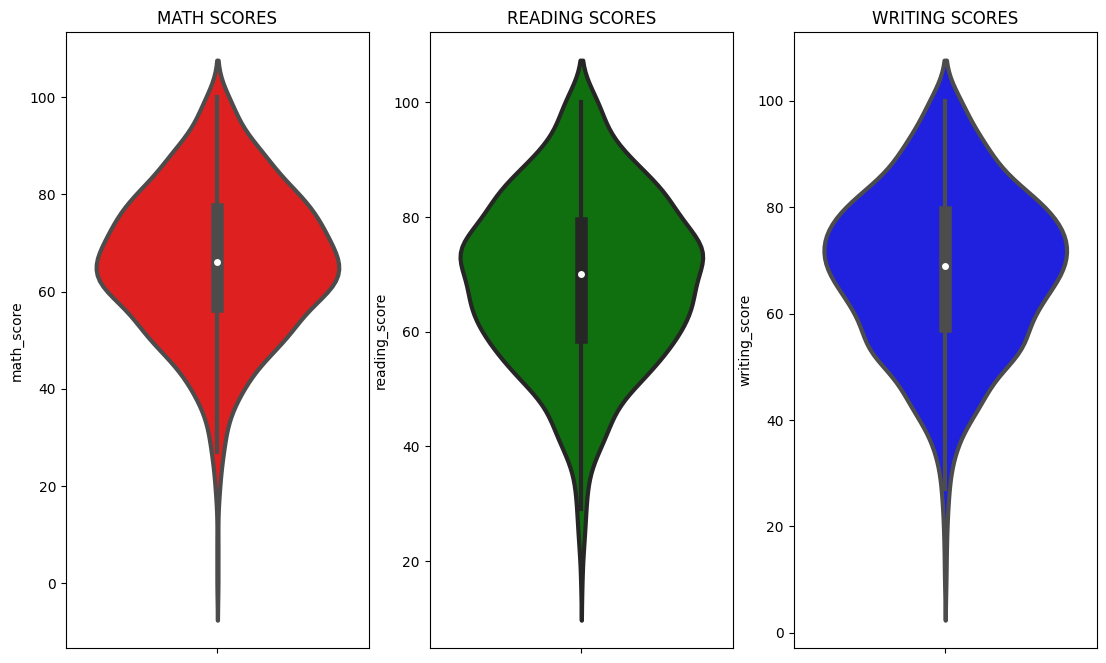

In [30]:
plt.figure(figsize=(18, 8))

plt.subplot(1, 4, 1)
plt.title(label='MATH SCORES')
sns.violinplot(y='math_score',
               data=df,
               color='red',
               linewidth=3)

plt.subplot(1, 4, 2)
plt.title(label='READING SCORES')
sns.violinplot(y='reading_score',
               data=df,
               color='green',
               linewidth=3)

plt.subplot(1, 4, 3)
plt.title(label='WRITING SCORES')
sns.violinplot(y='writing_score',
               data=df,
               color='blue',
               linewidth=3)

plt.show()

In [31]:
# Insights
print('[INFO...] From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80')

[INFO...] From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80


## 4.3 Multivariate analysis using pieplot

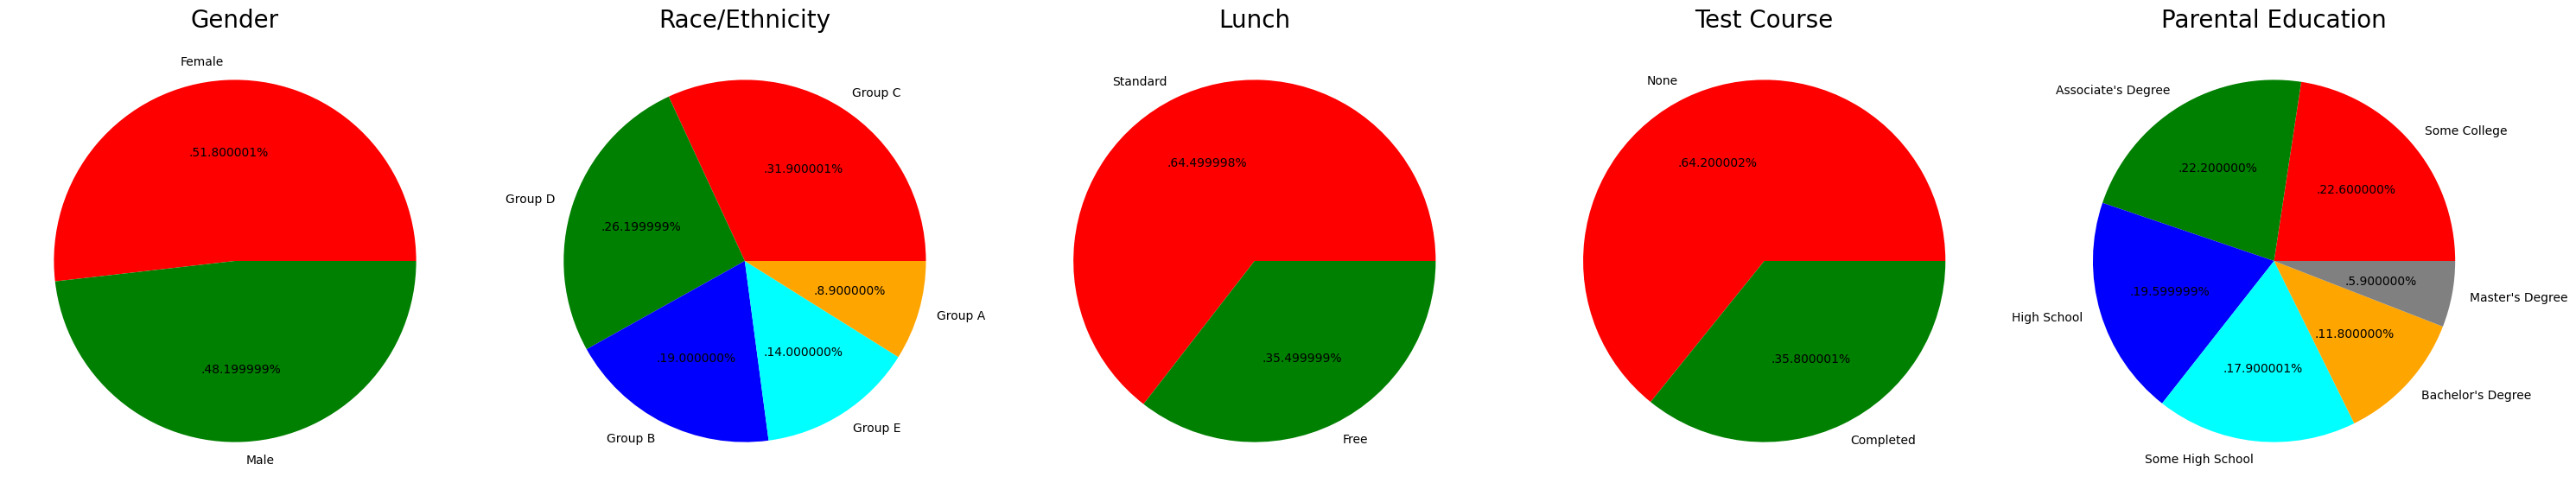

In [32]:
plt.rcParams['figure.figsize']=(30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(x=size,
        colors=color,
        labels=labels,
        autopct='.%2f%%')
plt.title(label='Gender', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 2)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(x=size,
        colors=color,
        labels=labels,
        autopct = '.%2f%%')
plt.title(label='Race/Ethnicity', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(x=size,
        colors=color,
        labels=labels,
        autopct='.%2f%%')
plt.title(label='Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']


plt.pie(x=size, 
        colors=color,
        labels=labels,
        autopct='.%2f%%')
plt.title(label='Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']


plt.pie(x=size,
        colors=color,
        labels=labels,
        autopct='.%2f%%')
plt.title(label='Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

In [33]:
# Insights
print('[INFO] Number of Male and Female students is almost equal.')
print('[INFO] Number students are greatest in Group C.')
print('[INFO] Number of students who have standard lunch are greater.')
print('[INFO] Number of students who have not enrolled in any test preparation course is greater.')
print("[INFO] Number of students whose parental education is 'Some College' is greater followed closely by 'Associate's Degree.")

[INFO] Number of Male and Female students is almost equal.
[INFO] Number students are greatest in Group C.
[INFO] Number of students who have standard lunch are greater.
[INFO] Number of students who have not enrolled in any test preparation course is greater.
[INFO] Number of students whose parental education is 'Some College' is greater followed closely by 'Associate's Degree.


## 4.4 Feature Wise Visualization

### 4.4.1 GENDER COLUMN
- How is distribution of Gender ?
- Is gender has any impact on student's performance ?

### UNIVARIATE ANALYSIS ( How is distribution of Gender ? )

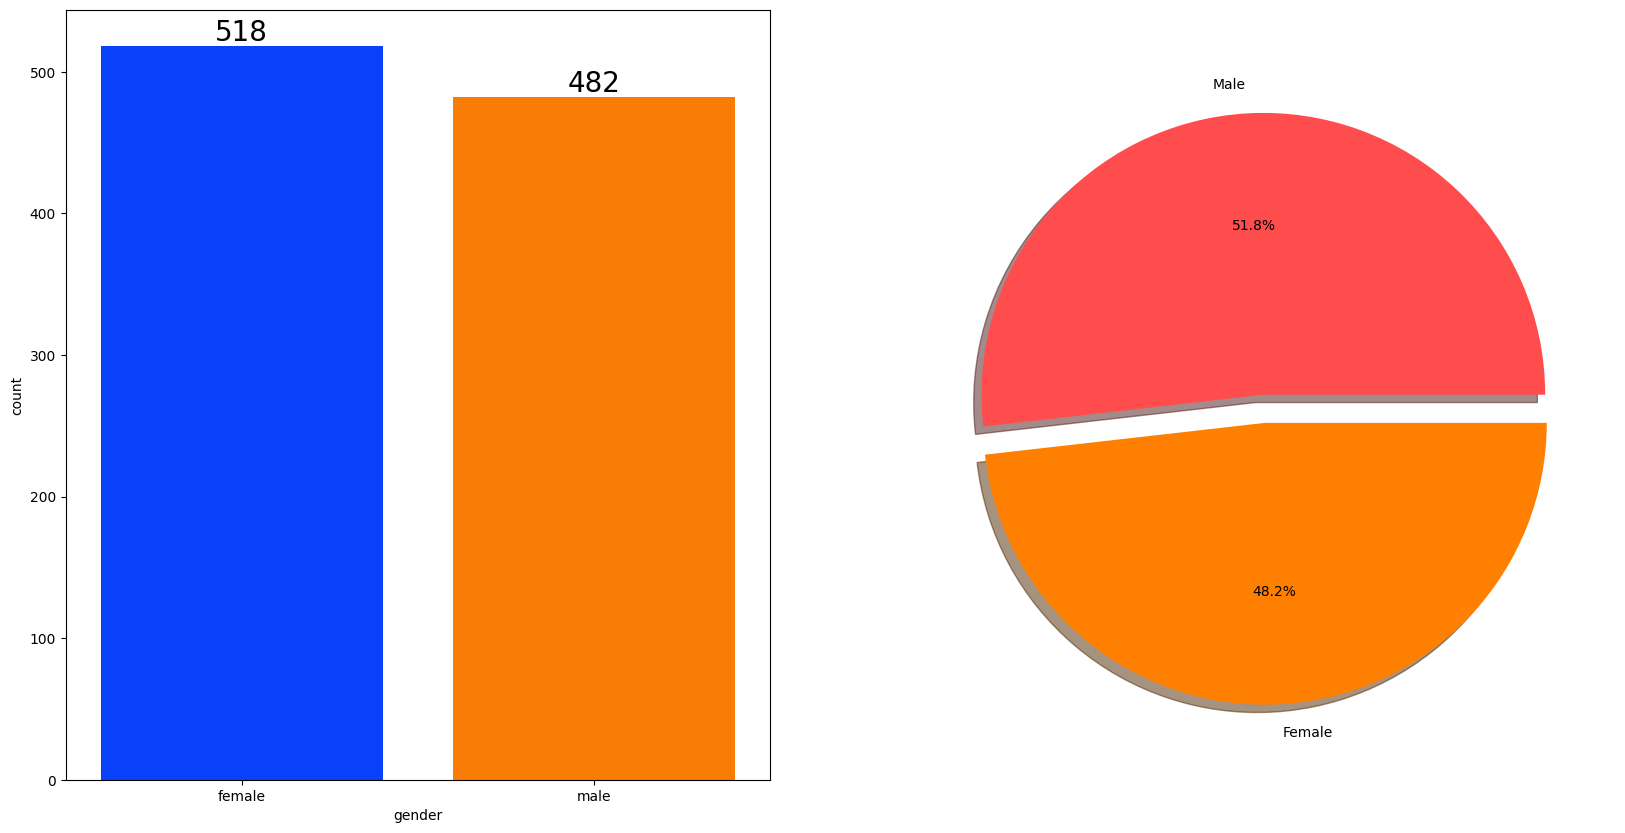

In [34]:
fig, axs=plt.subplots(1, 2, figsize=(20,10))
sns.countplot(x=df['gender'],
              data=df,
              palette='bright',
              ax=axs[0],
              saturation=0.95)
for container in axs[0].containers:
    axs[0].bar_label(container=container,
                     color='black',
                     size=20)
    
plt.pie(x=df['gender'].value_counts(),
        labels=['Male','Female'],
        explode=[0, 0.1],
        autopct='%1.1f%%',
        shadow=True,
        colors=['#ff4d4d','#ff8000'])
plt.show()

In [35]:
# Insights
print('[INFO...] Gender has balanced data with female students are 518 (48%) and male students are 482 (52%)')

[INFO...] Gender has balanced data with female students are 518 (48%) and male students are 482 (52%)


### BIVARIATE ANALYSIS ( Is gender has any impact on student's performance ? )

In [36]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.67
1,female,group C,some college,standard,completed,69,90,88,247,82.33
2,female,group B,master's degree,standard,none,90,95,93,278,92.67
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.33
4,male,group C,some college,standard,none,76,78,75,229,76.33


In [37]:
gender_group = df.groupby('gender')[['average_score', 'math_score']].mean()
gender_group

,average_score,math_score
gender,,
female,69.569498,63.633205
male,65.837303,68.728216


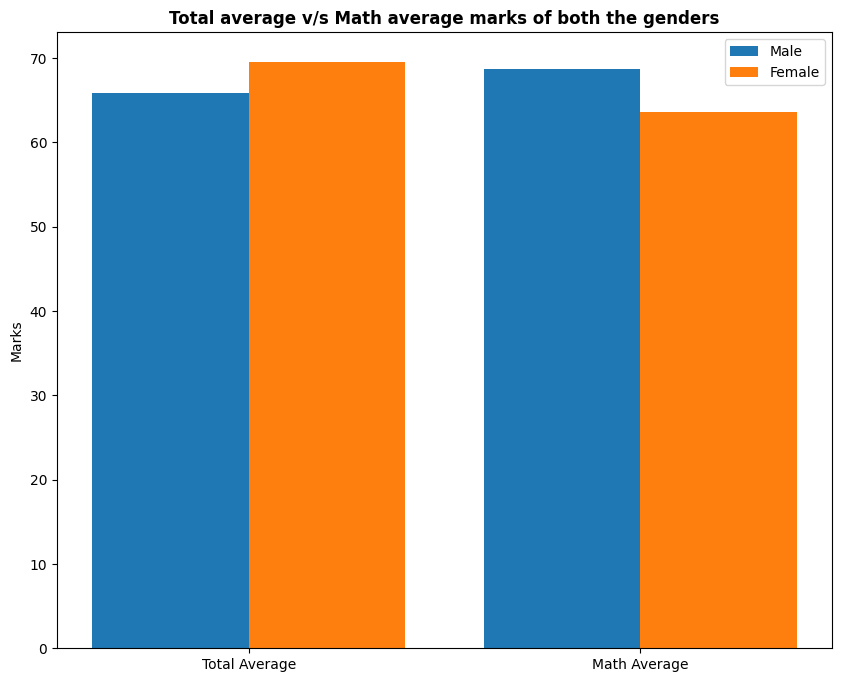

In [38]:
plt.figure(figsize=(10, 8))

X = ['Total Average','Math Average']


female_scores = [gender_group['average_score'][0], 
                 gender_group['math_score'][0]]
male_scores = [gender_group['average_score'][1],
               gender_group['math_score'][1]]

X_axis = np.arange(len(X))
  
plt.bar(x=X_axis - 0.2,
        height=male_scores,
        width=0.4,
        label = 'Male')
plt.bar(x=X_axis + 0.2,
        height=female_scores,
        width=0.4,
        label='Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title(label="Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

In [39]:
# Insights
print('[INFO...] On an average females have a better overall score than men.')
print('[INFO...] Whereas males have scored higher in Maths.')

[INFO...] On an average females have a better overall score than men.
[INFO...] Whereas males have scored higher in Maths.


## 4.4.2 RACE/EHNICITY COLUMN
- How is Group wise distribution ?
- Is Race/Ehnicity has any impact on student's performance ?

### UNIVARIATE ANALYSIS ( How is Group wise distribution ?)

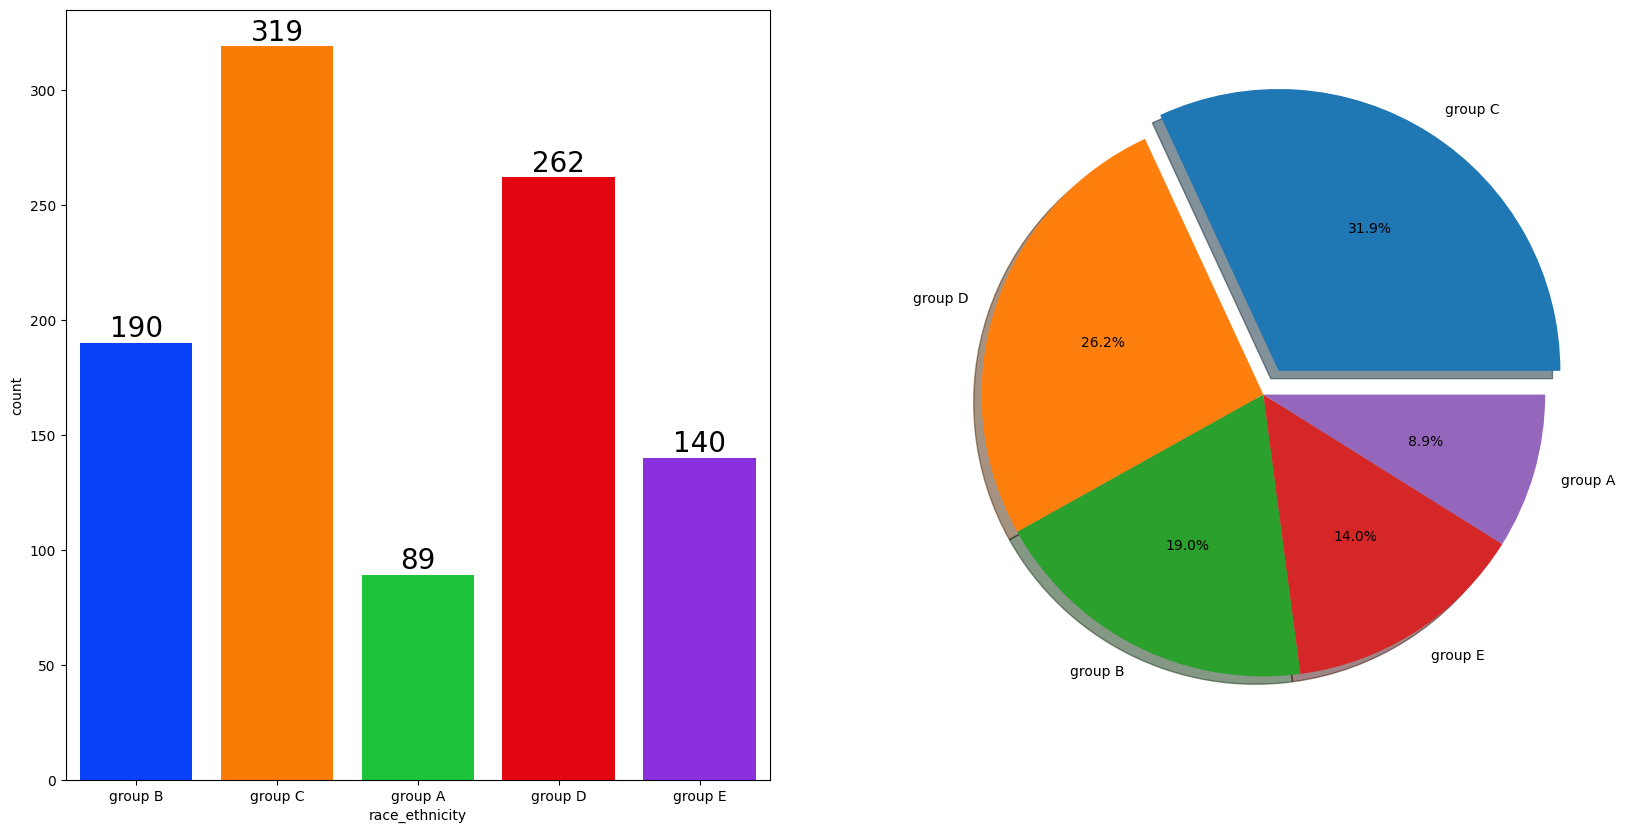

In [40]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race_ethnicity'],
              data=df,
              palette='bright',
              ax=ax[0],
              saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container=container,
                    color='black',
                    size=20)
    
plt.pie(x=df['race_ethnicity'].value_counts(),
        labels=df['race_ethnicity'].value_counts().index,
        explode=[0.1, 0,0, 0, 0],
        autopct='%1.1f%%',
        shadow=True)
plt.show()   

In [41]:
# Insights
print('[INFO...] Most of the student belonging from group C /group D.')
print('[INFO...] Lowest number of students belong to groupA.')

[INFO...] Most of the student belonging from group C /group D.
[INFO...] Lowest number of students belong to groupA.


## BIVARIATE ANALYSIS ( Is Race/Ehnicity has any impact on student's performance ? )

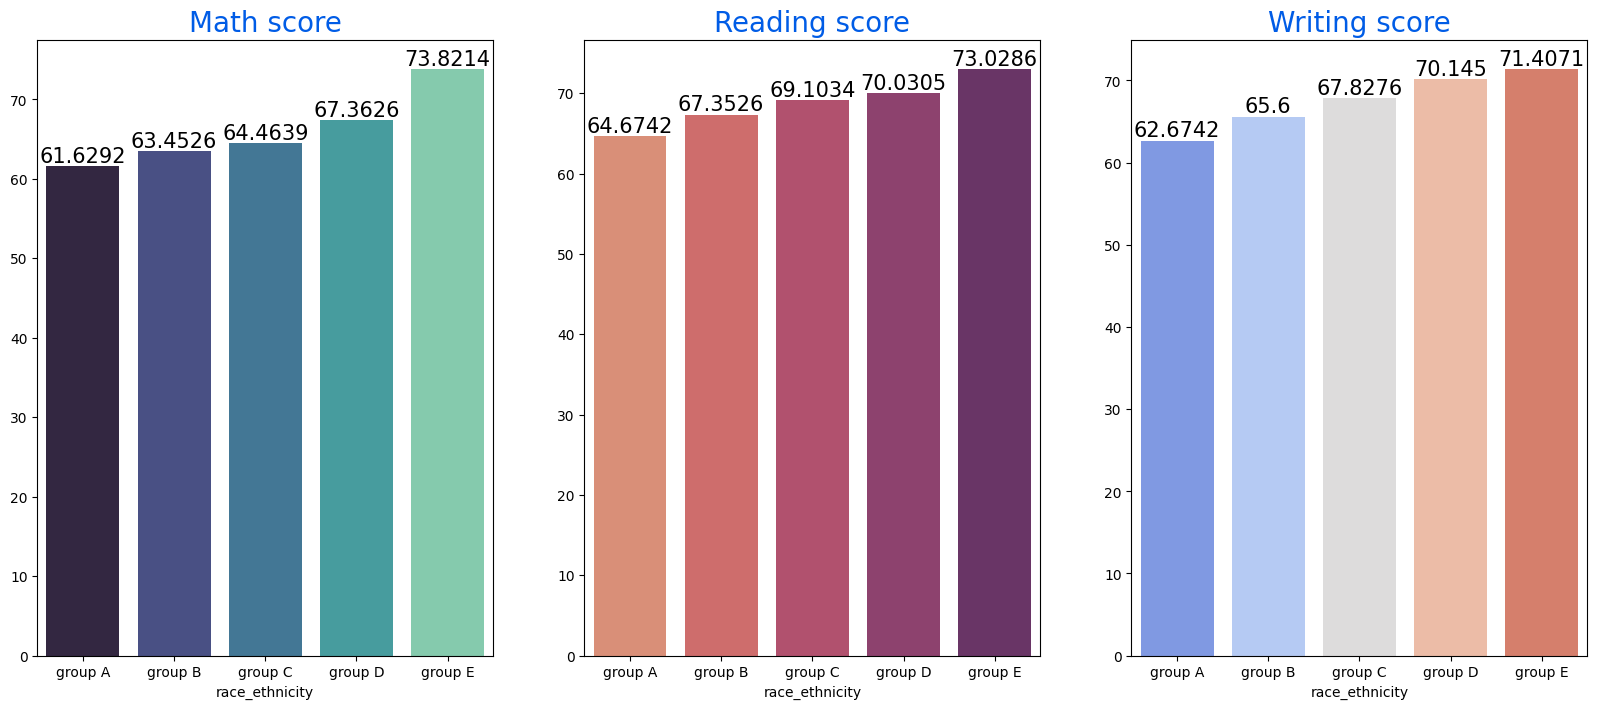

In [42]:
Group_data2=df.groupby('race_ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math_score'].mean().index,
            y=Group_data2['math_score'].mean().values,
            palette = 'mako',
            ax=ax[0])
ax[0].set_title(label='Math score', color='#005ce6', size=20)

for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=15)

sns.barplot(x=Group_data2['reading_score'].mean().index,
            y=Group_data2['reading_score'].mean().values,
            palette = 'flare',
            ax=ax[1])
ax[1].set_title(label='Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing_score'].mean().index,
            y=Group_data2['writing_score'].mean().values,
            palette='coolwarm',
            ax=ax[2])
ax[2].set_title(label='Writing score', color='#005ce6', size=20)

for container in ax[2].containers:
    ax[2].bar_label(container, color='black', size=15)

In [43]:
# Insights
print('[INFO...] Group E students have scored the highest marks.')
print('[INFO...] Group A students have scored the lowest marks.')
print('[INFO...] Students from a lower Socioeconomic status have a lower avg in all course subjects.')

[INFO...] Group E students have scored the highest marks.
[INFO...] Group A students have scored the lowest marks.
[INFO...] Students from a lower Socioeconomic status have a lower avg in all course subjects.


### 4.4.3 PARENTAL LEVEL OF EDUCATION COLUMN
- What is educational background of student's parent ?
- Is parental education has any impact on student's performance ?

In [44]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.67
1,female,group C,some college,standard,completed,69,90,88,247,82.33
2,female,group B,master's degree,standard,none,90,95,93,278,92.67
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.33
4,male,group C,some college,standard,none,76,78,75,229,76.33


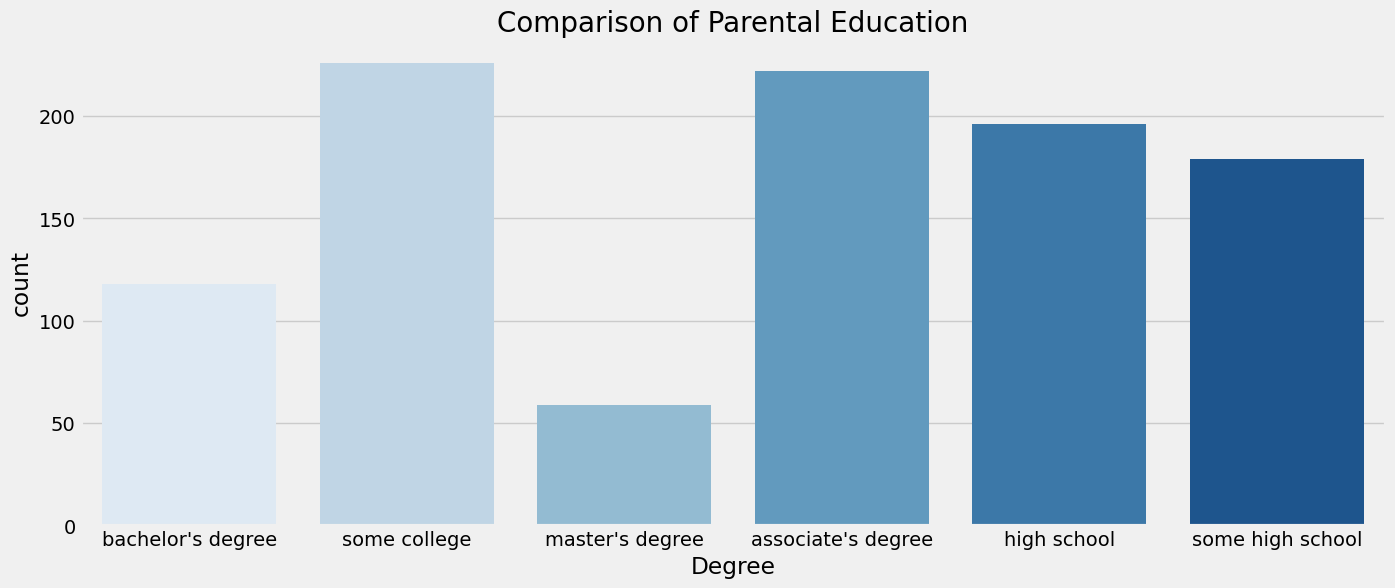

In [45]:
plt.rcParams['figure.figsize']=(15, 6)
plt.style.use('fivethirtyeight')
sns.countplot(x='parental_level_of_education',
              data=df,
              palette='Blues')
plt.title(label='Comparison of Parental Education', fontweight=30, fontsize=20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

In [46]:
# Insights
print('[INFO...] Largest number of parents are from some college.')

[INFO...] Largest number of parents are from some college.


## BIVARIATE ANALYSIS (Is parental education has any impact on student's performance ?)

In [47]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.67
1,female,group C,some college,standard,completed,69,90,88,247,82.33
2,female,group B,master's degree,standard,none,90,95,93,278,92.67
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.33
4,male,group C,some college,standard,none,76,78,75,229,76.33


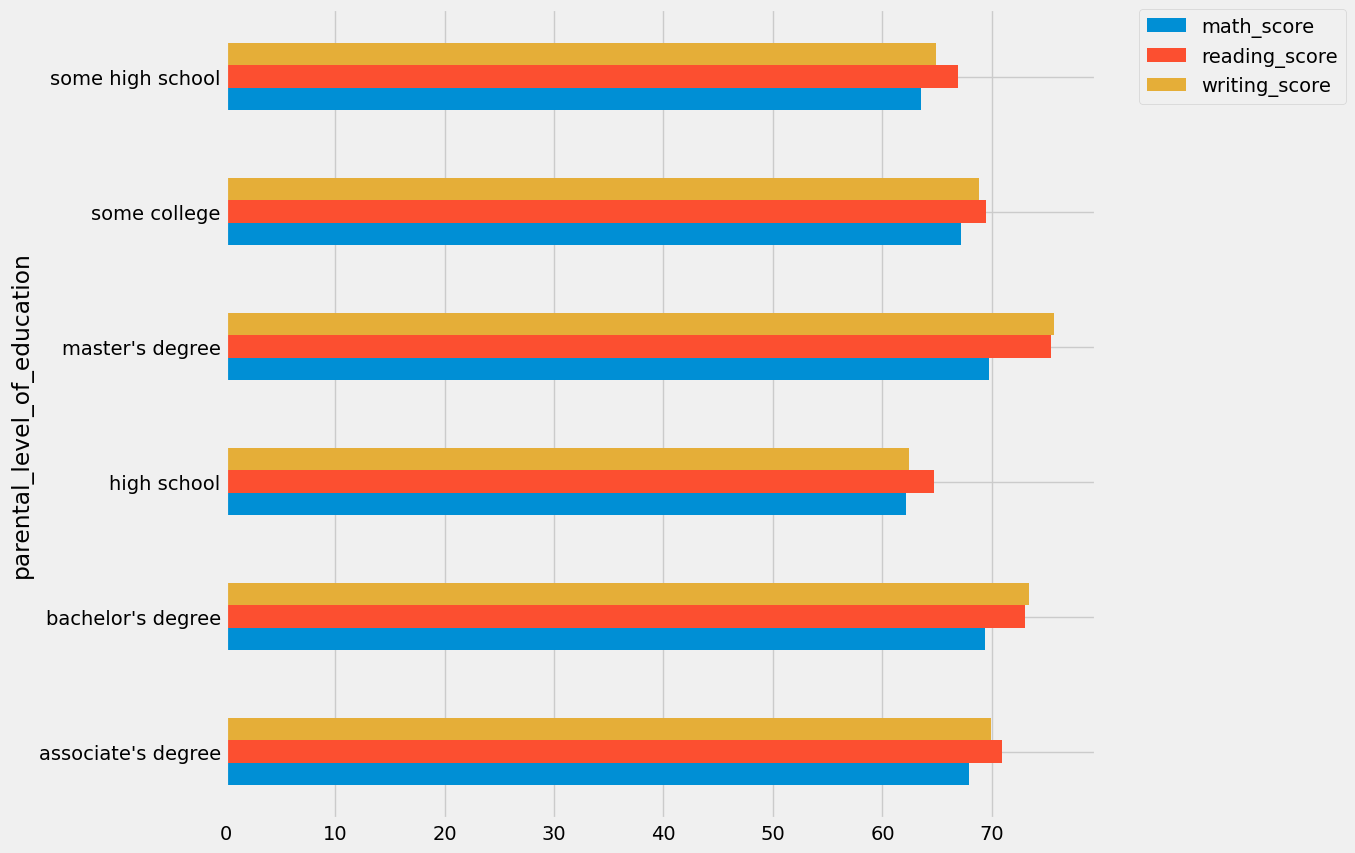

In [48]:
df.groupby('parental_level_of_education')[['math_score', 'reading_score', 'writing_score']].agg('mean').plot(kind='barh',
                                                                                                             figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), 
           loc=2, 
           borderaxespad=0.)
plt.show()

In [49]:
# Insights
print('[INFO...] The score of student whose parents possess master and bachelor level education are higher than others.')

[INFO...] The score of student whose parents possess master and bachelor level education are higher than others.


### 4.4.4 LUNCH COLUMN
- Which type of lunch is most common amoung students ?
- What is the effect of lunch type on test results?

### UNIVARIATE ANALYSIS ( Which type of lunch is most common amoung students ? )

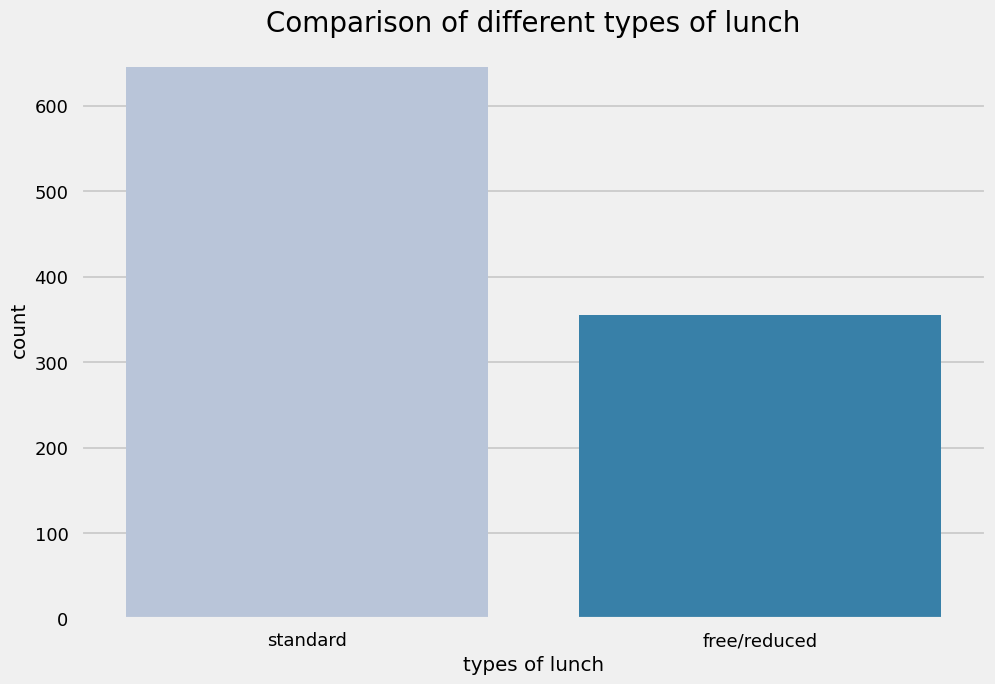

In [50]:
plt.rcParams['figure.figsize']=(6, 6)
plt.style.use('seaborn-talk')
sns.countplot(x='lunch', 
              data=df, 
              palette = 'PuBu')
plt.title(label='Comparison of different types of lunch', fontweight=30, fontsize=20)
plt.xlabel('types of lunch')
plt.ylabel('count')
plt.show()

In [51]:
# Insights
print('[INFO...] Students being served Standard lunch was more than free lunch.')

[INFO...] Students being served Standard lunch was more than free lunch.


### BIVARIATE ANALYSIS ( Is lunch type intake has any impact on student's performance ? )

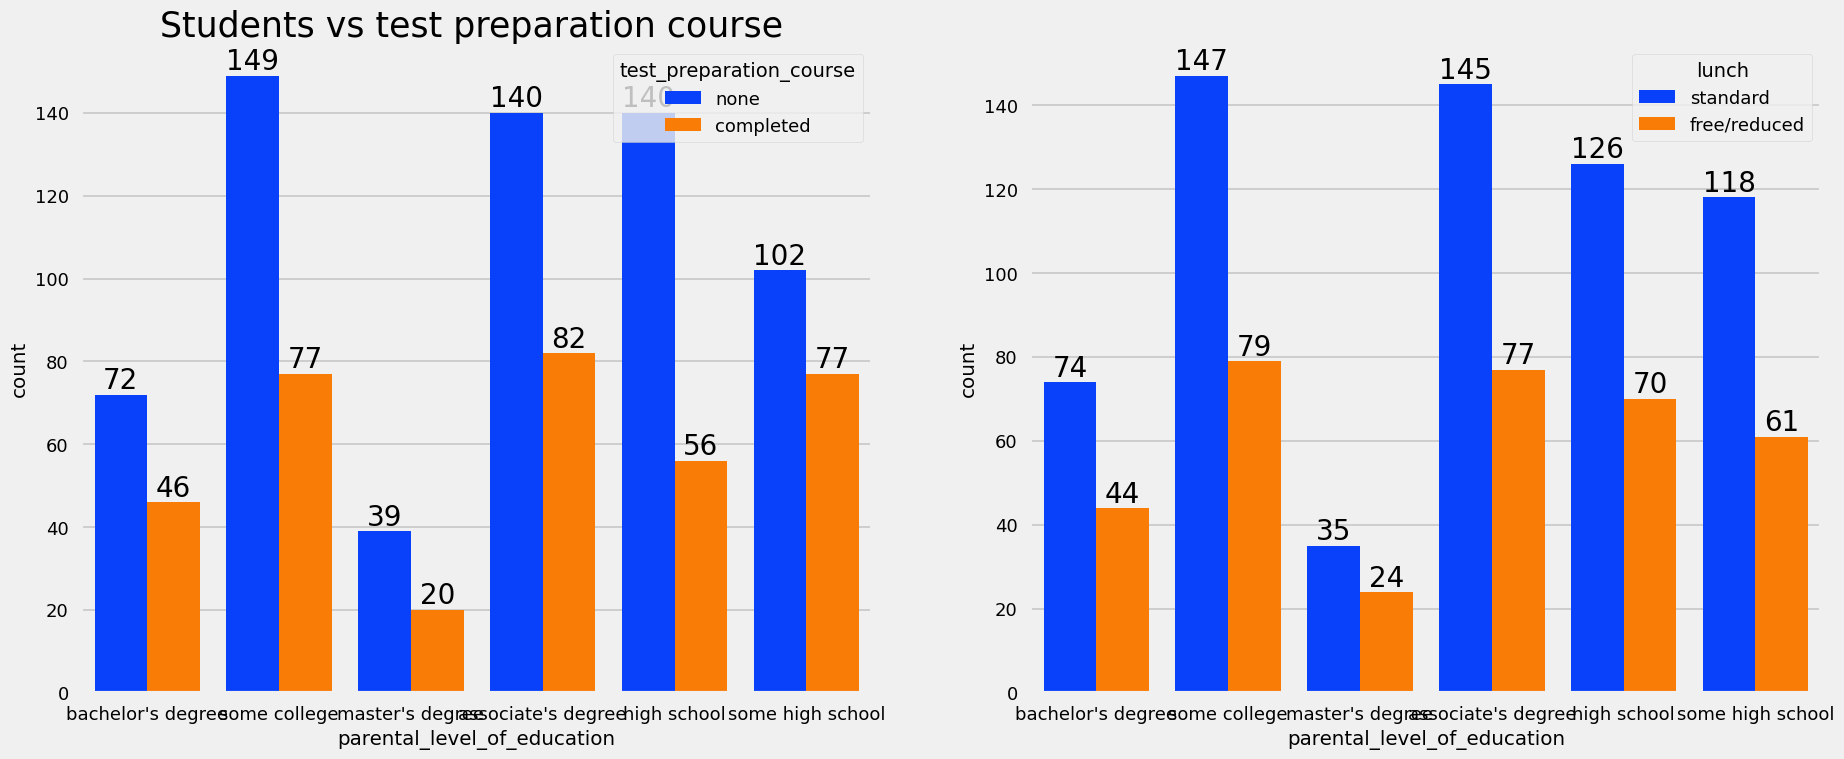

In [52]:
f,ax=plt.subplots(1, 2, figsize=(20,8))
sns.countplot(x='parental_level_of_education',
              data=df,
              palette='bright',
              hue='test_preparation_course',
              saturation=0.95,
              ax=ax[0])
ax[0].set_title(label='Students vs test preparation course ',color='black',size=25)
for container in ax[0].containers:
    ax[0].bar_label(container=container,color='black',size=20)
    
sns.countplot(x='parental_level_of_education',
              data=df,
              palette='bright',
              hue='lunch',
              saturation=0.95,ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container=container,color='black',size=20)   

In [53]:
# Insights
print('[INFO...] Students who get Standard Lunch tend to perform better than students who got free/reduced lunch.')

[INFO...] Students who get Standard Lunch tend to perform better than students who got free/reduced lunch.


## 4.4.5 TEST PREPARATION COURSE COLUMN
- Which type of lunch is most common amoung students ?
- Is Test prepration course has any impact on student's performance ?

### BIVARIATE ANALYSIS ( Is Test prepration course has any impact on student's performance ? )

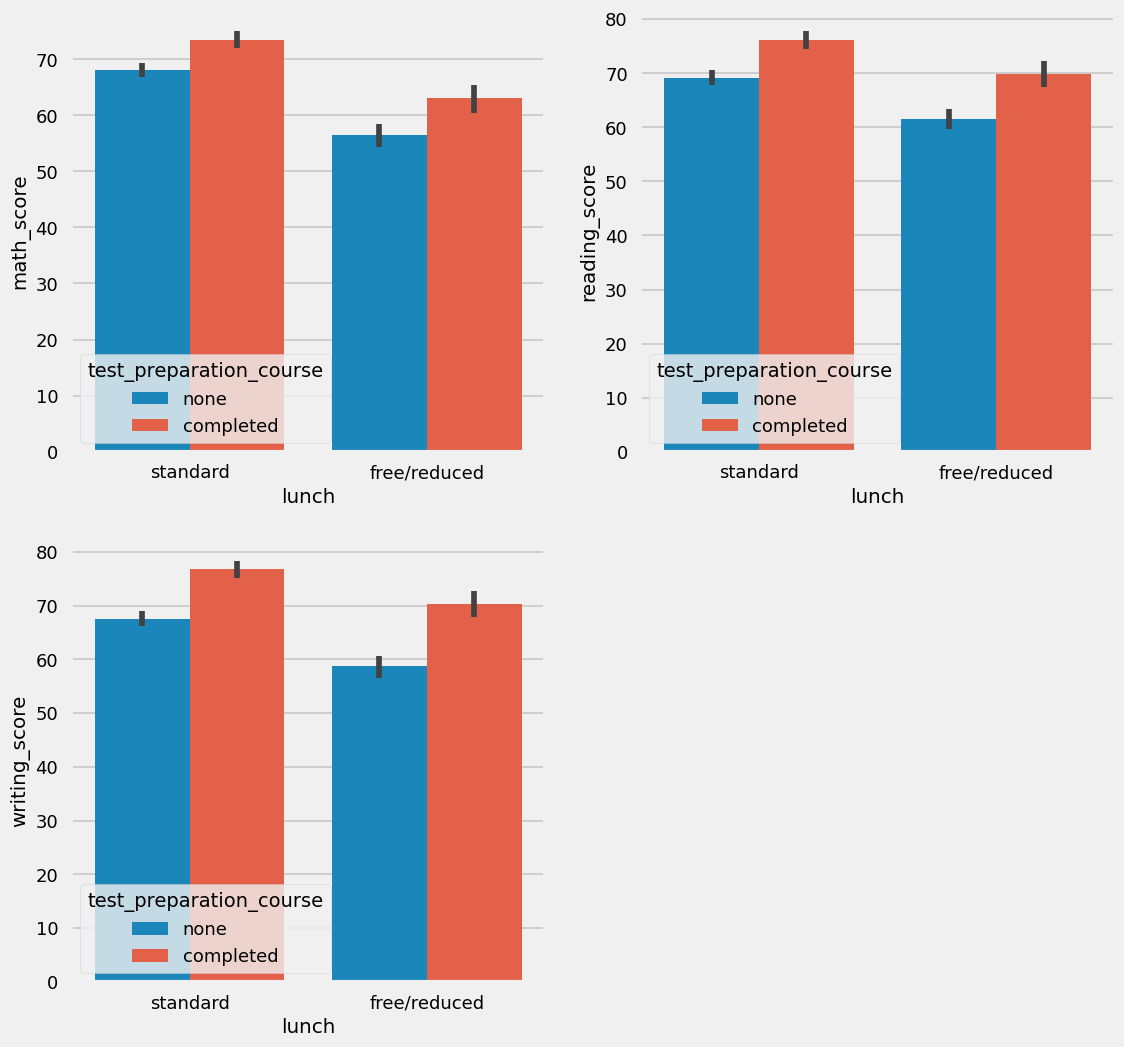

In [54]:
plt.figure(figsize=(12,12))

plt.subplot(2, 2, 1)
sns.barplot (x='lunch',
             y='math_score',
             data=df,
             hue='test_preparation_course')

plt.subplot(2, 2, 2)
sns.barplot (x='lunch',
             y='reading_score',
             data=df,
             hue='test_preparation_course')

plt.subplot(2, 2, 3)
sns.barplot (x='lunch',
             y='writing_score',
             data=df,
             hue='test_preparation_course')
plt.show()

In [55]:
# Insights
print("[INFO...] Students who have completed the Test Prepration Course have scores higher in all three categories than those who haven't taken the course.")

[INFO...] Students who have completed the Test Prepration Course have scores higher in all three categories than those who haven't taken the course.


## 4.4.6 CHECKING OUTLIERS

In [56]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.67
1,female,group C,some college,standard,completed,69,90,88,247,82.33
2,female,group B,master's degree,standard,none,90,95,93,278,92.67
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.33
4,male,group C,some college,standard,none,76,78,75,229,76.33


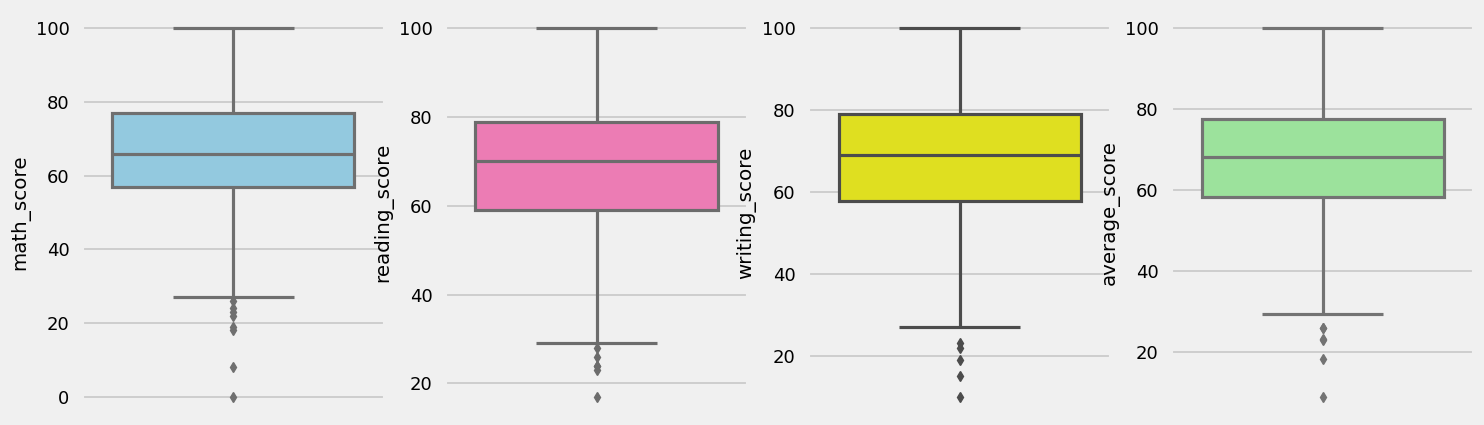

In [57]:
plt.subplots(1, 4, figsize=(16,5))
plt.subplot(141)
sns.boxplot(y='math_score',
            data=df,
            color='skyblue')

plt.subplot(142)
sns.boxplot(y='reading_score',
            data=df,
            color='hotpink')

plt.subplot(143)
sns.boxplot(y='writing_score',
            data=df,
            color='yellow')

plt.subplot(144)
sns.boxplot(y='average_score',
            data=df,
            color='lightgreen')
plt.show()

## 4.4.7 MUTIVARIATE ANALYSIS USING PAIRPLOT

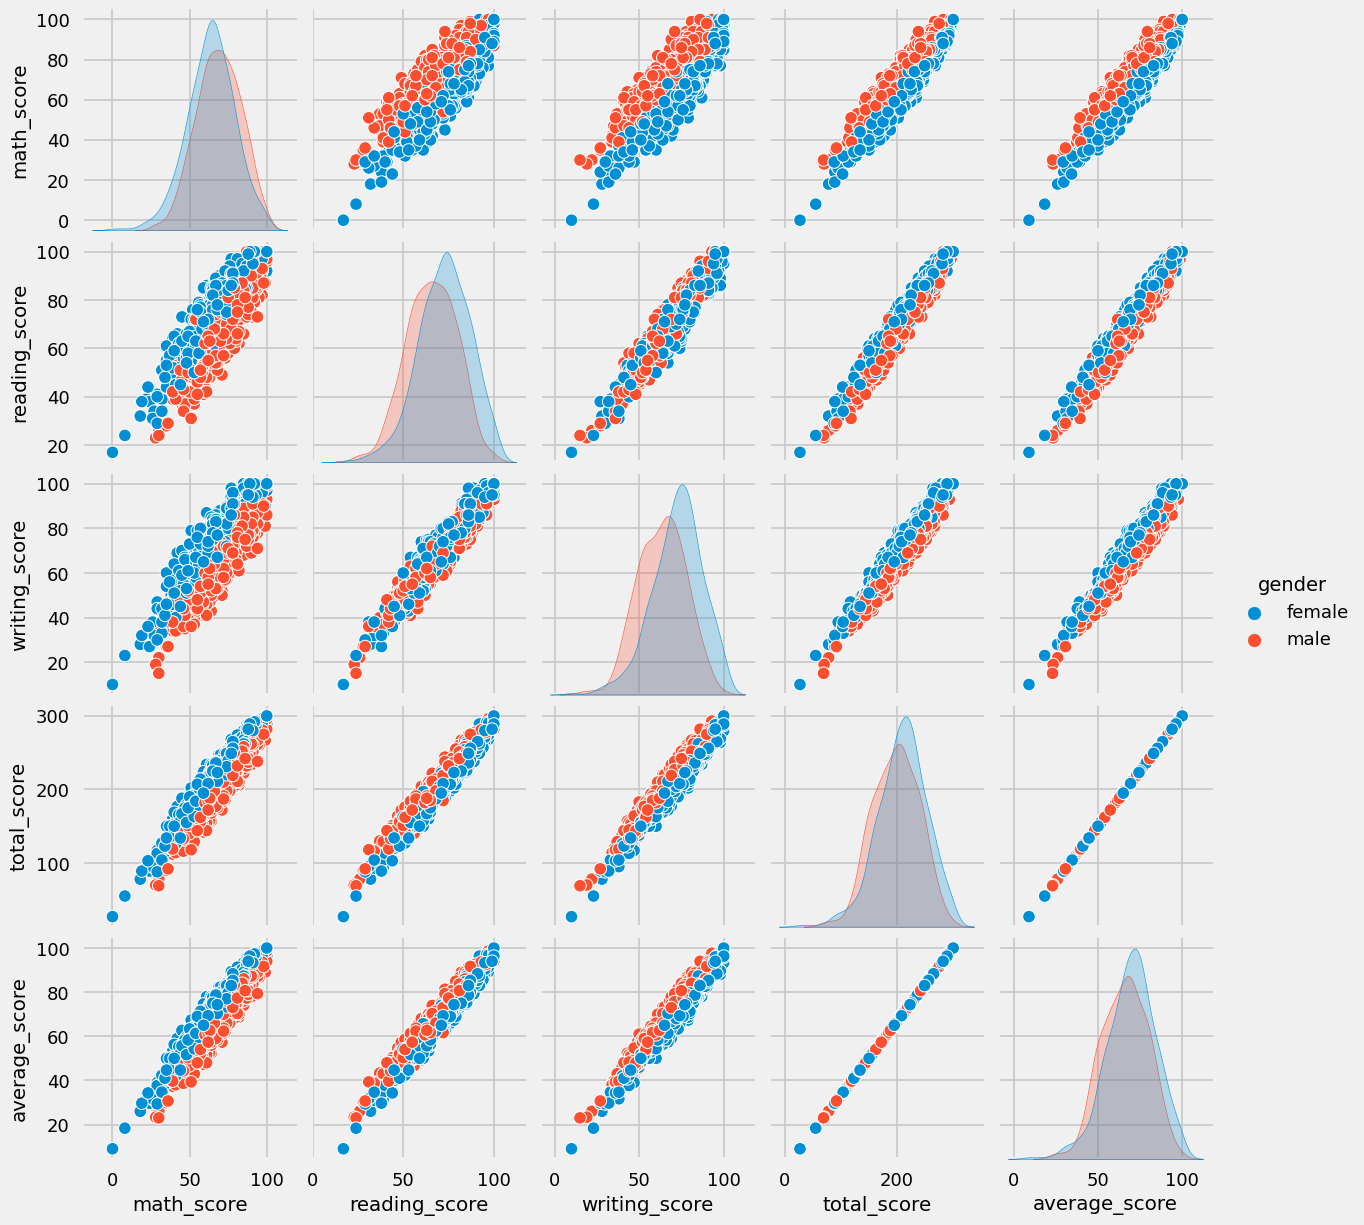

In [58]:
sns.pairplot(data=df, hue='gender')
plt.show()

In [59]:
# Insights
print('[INFO...] From the above plot it is clear that all the scores increase linearly with each other.')

[INFO...] From the above plot it is clear that all the scores increase linearly with each other.
